**Chapter 10 – Introduction to Artificial Neural Networks with Keras**

_This notebook contains all the sample code and solutions to the exercises in chapter 10._

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0-preview.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Perceptrons

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred

array([1])

Saving figure perceptron_iris_plot


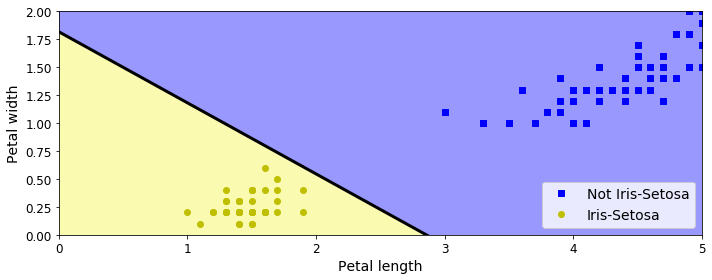

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


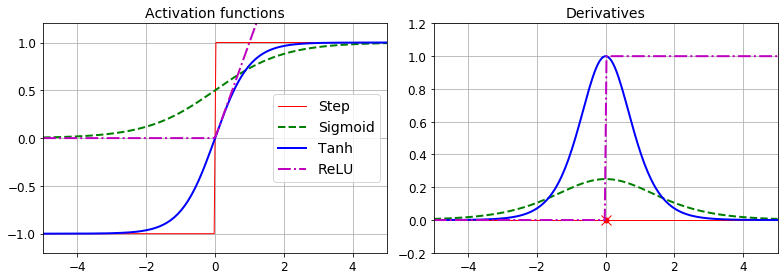

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

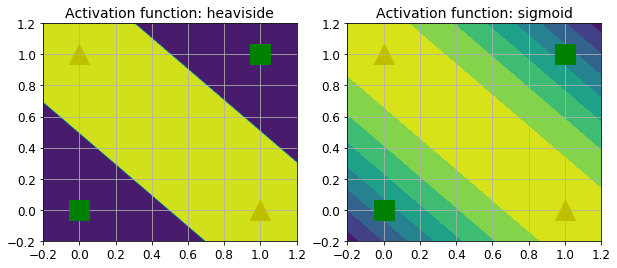

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
tf.__version__

'2.0.0'

In [11]:
keras.__version__

'2.2.4-tf'

### (bstudent) Check for GPU:

In [12]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### (bstudent) Assuming one or more GPUs, set the strategy to MirroredStrategy

The tf doc does not explicitly say that Mirrored strategy works when there is one GPU, but the description seems to imply that the multi-GPU distribution would work as well for one as for many.

Note there is a separate OneDeviceStrategy

#### According to doc https://www.tensorflow.org/guide/distributed_training

This will create a MirroredStrategy instance which will use all the GPUs that are visible to TensorFlow, and use NCCL as the cross device communication.

In [14]:
# mirrored_strategy = tf.distribute.MirroredStrategy()

## NOTE: it looks like when the lib is tensorflow-gpu and we load tf, by default operations are run with what appears to be the default OneDeviceStrategy(), i.e. without setting mirrored strategy explicitly one GPU is used.

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [14]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [15]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [16]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

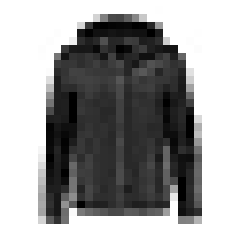

In [17]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [18]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [20]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [21]:
X_valid.shape

(5000, 28, 28)

In [22]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

Saving figure fashion_mnist_plot


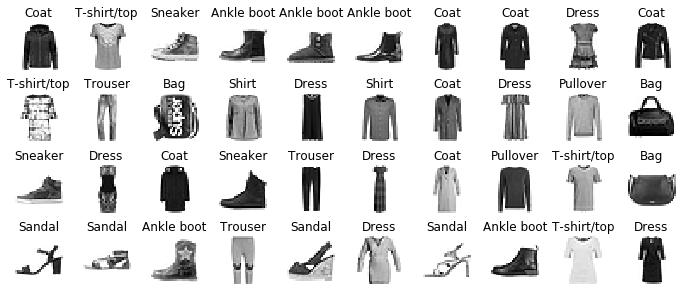

In [23]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [24]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [25]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [26]:
model.layers

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


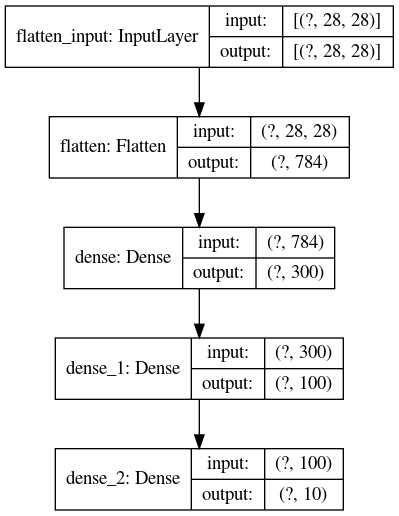

In [28]:
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [29]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [30]:
model.get_layer(hidden1.name) is hidden1

True

In [31]:
weights, biases = hidden1.get_weights()

In [32]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [33]:
weights.shape

(784, 300)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
biases.shape

(300,)

In [36]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [74]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 100us/sample - loss: 0.7228 - accuracy: 0.7622 - val_loss: 0.5305 - val_accuracy: 0.8156
Epoch 2/30
55000/55000 [==============================] - 5s 89us/sample - loss: 0.4839 - accuracy: 0.8325 - val_loss: 0.4493 - val_accuracy: 0.8446
Epoch 3/30
55000/55000 [==============================] - 5s 88us/sample - loss: 0.4380 - accuracy: 0.8470 - val_loss: 0.4165 - val_accuracy: 0.8552
Epoch 4/30
55000/55000 [==============================] - 5s 90us/sample - loss: 0.4127 - accuracy: 0.8556 - val_loss: 0.3901 - val_accuracy: 0.8660
Epoch 5/30
55000/55000 [==============================] - 5s 89us/sample - loss: 0.3929 - accuracy: 0.8628 - val_loss: 0.3963 - val_accuracy: 0.8624
Epoch 6/30
55000/55000 [==============================] - 5s 90us/sample - loss: 0.3775 - accuracy: 0.8669 - val_loss: 0.3724 - val_accuracy: 0.8744
Epoch 7/30
55000/55000 [==============================] 

## Let's try the above again with `MirroredStragety()`:

make the clf:

In [37]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [38]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Use this for default devices (which appear to be just one even if there are multiple present):

In [76]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

mirrored_strategy = tf.distribute.MirroredStrategy()
mirrored_strategy.num_replicas_in_sync

3

Use this for multiple devices (3 in this case):

In [54]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

mirrored_strategy = tf.distribute.MirroredStrategy(devices=['/GPU:1','/GPU:2'])
mirrored_strategy.num_replicas_in_sync

2

In [55]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

mirrored_strategy = tf.distribute.OneDeviceStrategy(device='/GPU:2')
mirrored_strategy.num_replicas_in_sync

1

In [77]:
with mirrored_strategy.scope():
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

## Or with one GPU try this: 

In [39]:
# Note this is the one line changed from above:
mirrored_strategy = tf.distribute.OneDeviceStrategy('/GPU:0')

with mirrored_strategy.scope():
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

run the model training:

In [40]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.7228 - accuracy: 0.7622 - val_loss: 0.5305 - val_accuracy: 0.8156
Epoch 2/30
55000/55000 [==============================] - 2s 45us/sample - loss: 0.4838 - accuracy: 0.8325 - val_loss: 0.4498 - val_accuracy: 0.8444
Epoch 3/30
55000/55000 [==============================] - 2s 45us/sample - loss: 0.4379 - accuracy: 0.8469 - val_loss: 0.4171 - val_accuracy: 0.8550
Epoch 4/30
55000/55000 [==============================] - 3s 46us/sample - loss: 0.4126 - accuracy: 0.8557 - val_loss: 0.3900 - val_accuracy: 0.8646
Epoch 5/30
55000/55000 [==============================] - 3s 46us/sample - loss: 0.3929 - accuracy: 0.8627 - val_loss: 0.3967 - val_accuracy: 0.8616
Epoch 6/30
55000/55000 [==============================] - 2s 45us/sample - loss: 0.3775 - accuracy: 0.8675 - val_loss: 0.3737 - val_accuracy: 0.8738
Epoch 7/30
55000/55000 [==============================] -

In [41]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [42]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Use dir() method on the history object to see all its members:

In [48]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_keras_api_names',
 '_keras_api_names_v1',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

Saving figure keras_learning_curves_plot


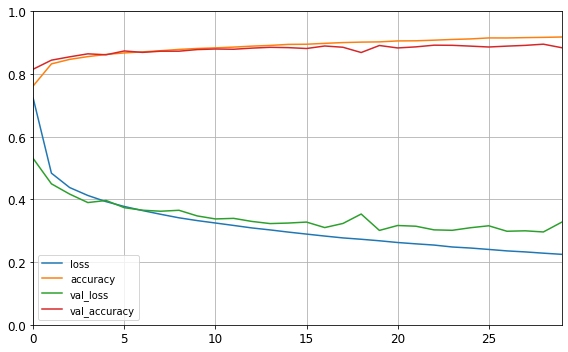

In [49]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [50]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.36290115684270857, 0.8686]

In [51]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [52]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [53]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [54]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [55]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


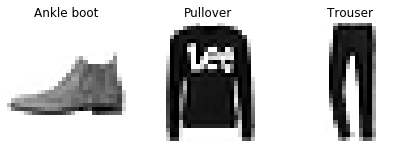

In [56]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# Regression MLP

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [57]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [49]:
np.random.seed(42)
tf.random.set_seed(42)

In [58]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 69us/sample - loss: 1.8199 - val_loss: 2.8708
Epoch 2/20
11610/11610 [==============================] - 1s 55us/sample - loss: 0.7018 - val_loss: 0.6690
Epoch 3/20
11610/11610 [==============================] - 1s 57us/sample - loss: 0.6369 - val_loss: 0.5962
Epoch 4/20
11610/11610 [==============================] - 1s 51us/sample - loss: 0.6051 - val_loss: 0.5673
Epoch 5/20
11610/11610 [==============================] - 1s 55us/sample - loss: 0.5787 - val_loss: 0.5809
Epoch 6/20
11610/11610 [==============================] - 1s 55us/sample - loss: 0.5557 - val_loss: 0.5280
Epoch 7/20
11610/11610 [==============================] - 1s 55us/sample - loss: 0.5368 - val_loss: 0.5229
Epoch 8/20
11610/11610 [==============================] - 1s 51us/sample - loss: 0.5212 - val_loss: 0.5061
Epoch 9/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.5074 - val_l

Check that with explicit GPU strategy:

In [60]:
mirrored_strategy = tf.distribute.OneDeviceStrategy('/GPU:0')

with mirrored_strategy.scope():
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
        keras.layers.Dense(1)
    ])
    model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

In [61]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 72us/sample - loss: 1.9799 - val_loss: 1.6358
Epoch 2/20
11610/11610 [==============================] - 1s 43us/sample - loss: 0.7533 - val_loss: 0.6848
Epoch 3/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.6643 - val_loss: 0.6196
Epoch 4/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.6221 - val_loss: 0.5875
Epoch 5/20
11610/11610 [==============================] - 1s 43us/sample - loss: 0.5895 - val_loss: 0.5615
Epoch 6/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.5598 - val_loss: 0.5320
Epoch 7/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.5356 - val_loss: 0.4990
Epoch 8/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.5137 - val_loss: 0.4776
Epoch 9/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4952 - val_l

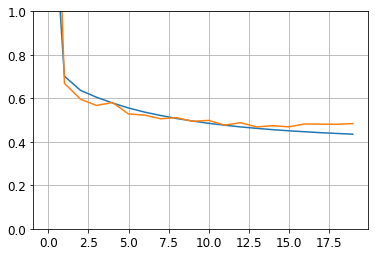

In [59]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [62]:
y_pred

array([[0.37569433],
       [1.6646395 ],
       [3.4655254 ]], dtype=float32)

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [63]:
np.random.seed(42)
tf.random.set_seed(42)

In [64]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [65]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           930         dense_7[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_8[0][0]                

In [66]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 76us/sample - loss: 1.2474 - val_loss: 0.8727
Epoch 2/20
11610/11610 [==============================] - 1s 56us/sample - loss: 0.6341 - val_loss: 0.8881
Epoch 3/20
11610/11610 [==============================] - 1s 63us/sample - loss: 0.5885 - val_loss: 0.5573
Epoch 4/20
11610/11610 [==============================] - 1s 58us/sample - loss: 0.5599 - val_loss: 0.5238
Epoch 5/20
11610/11610 [==============================] - 1s 57us/sample - loss: 0.5367 - val_loss: 0.6201
Epoch 6/20
11610/11610 [==============================] - 1s 56us/sample - loss: 0.5170 - val_loss: 0.4979
Epoch 7/20
11610/11610 [==============================] - 1s 56us/sample - loss: 0.5022 - val_loss: 0.5240
Epoch 8/20
11610/11610 [==============================] - 1s 57us/sample - loss: 0.4885 - val_loss: 0.4538
Epoch 9/20
11610/11610 [==============================] - 1s 57us/sample - loss: 0.4778 - val_l

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [67]:
np.random.seed(42)
tf.random.set_seed(42)

In [68]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [69]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 77us/sample - loss: 1.8095 - val_loss: 1.4409
Epoch 2/20
11610/11610 [==============================] - 1s 63us/sample - loss: 0.6798 - val_loss: 0.6123
Epoch 3/20
11610/11610 [==============================] - 1s 60us/sample - loss: 0.5957 - val_loss: 0.5618
Epoch 4/20
11610/11610 [==============================] - 1s 62us/sample - loss: 0.5580 - val_loss: 0.5514
Epoch 5/20
11610/11610 [==============================] - 1s 62us/sample - loss: 0.5331 - val_loss: 0.5073
Epoch 6/20
11610/11610 [==============================] - 1s 58us/sample - loss: 0.5124 - val_loss: 0.4860
Epoch 7/20
11610/11610 [==============================] - 1s 63us/sample - loss: 0.4972 - val_loss: 0.4631
Epoch 8/20
11610/11610 [==============================] - 1s 59us/sample - loss: 0.4834 - val_loss: 0.4514
Epoch 9/20
11610/11610 [==============================] - 1s 61us/sample - loss: 0.4746 - val_l

Adding an auxiliary output for regularization:

In [70]:
np.random.seed(42)
tf.random.set_seed(42)

In [71]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [72]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [73]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 101us/sample - loss: 2.1329 - main_output_loss: 1.9166 - aux_output_loss: 4.0719 - val_loss: 2.2885 - val_main_output_loss: 1.5657 - val_aux_output_loss: 8.7861
Epoch 2/20
11610/11610 [==============================] - 1s 70us/sample - loss: 0.8910 - main_output_loss: 0.6989 - aux_output_loss: 2.6202 - val_loss: 1.4258 - val_main_output_loss: 0.6285 - val_aux_output_loss: 8.5972
Epoch 3/20
11610/11610 [==============================] - 1s 70us/sample - loss: 0.7397 - main_output_loss: 0.6064 - aux_output_loss: 1.9374 - val_loss: 1.3894 - val_main_output_loss: 0.5941 - val_aux_output_loss: 8.5417
Epoch 4/20
11610/11610 [==============================] - 1s 69us/sample - loss: 0.6746 - main_output_loss: 0.5684 - aux_output_loss: 1.6301 - val_loss: 1.3275 - val_main_output_loss: 0.6028 - val_aux_output_loss: 7.8451
Epoch 5/20
11610/11610 [==============================] - 1s 71us/

In [74]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# The subclassing API

In [75]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [76]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 108us/sample - loss: 2.2968 - output_1_loss: 2.1826 - output_2_loss: 3.3166 - val_loss: 3.0093 - val_output_1_loss: 1.5519 - val_output_2_loss: 16.1139
Epoch 2/10
11610/11610 [==============================] - 1s 69us/sample - loss: 0.9760 - output_1_loss: 0.8529 - output_2_loss: 2.0834 - val_loss: 1.9291 - val_output_1_loss: 0.7524 - val_output_2_loss: 12.5119
Epoch 3/10
11610/11610 [==============================] - 1s 69us/sample - loss: 0.8288 - output_1_loss: 0.7270 - output_2_loss: 1.7431 - val_loss: 1.6768 - val_output_1_loss: 0.7256 - val_output_2_loss: 10.2305
Epoch 4/10
11610/11610 [==============================] - 1s 69us/sample - loss: 0.7637 - output_1_loss: 0.6744 - output_2_loss: 1.5665 - val_loss: 1.4544 - val_output_1_loss: 0.6860 - val_output_2_loss: 8.3638
Epoch 5/10
11610/11610 [==============================] - 1s 72us/sample - loss: 0.7227 - output_1_loss

In [77]:
model = WideAndDeepModel(30, activation="relu")

# Saving and Restoring

In [78]:
np.random.seed(42)
tf.random.set_seed(42)

In [79]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [80]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 73us/sample - loss: 1.8631 - val_loss: 3.2403
Epoch 2/10
11610/11610 [==============================] - 1s 59us/sample - loss: 0.6723 - val_loss: 0.6938
Epoch 3/10
11610/11610 [==============================] - 1s 57us/sample - loss: 0.5927 - val_loss: 0.5531
Epoch 4/10
11610/11610 [==============================] - 1s 57us/sample - loss: 0.5550 - val_loss: 0.5519
Epoch 5/10
11610/11610 [==============================] - 1s 57us/sample - loss: 0.5278 - val_loss: 0.5715
Epoch 6/10
11610/11610 [==============================] - 1s 53us/sample - loss: 0.5032 - val_loss: 0.5590
Epoch 7/10
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4863 - val_loss: 0.4593
Epoch 8/10
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4701 - val_loss: 0.4651
Epoch 9/10
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4586 - val_l

In [81]:
model.save("my_keras_model.h5")

In [82]:
model = keras.models.load_model("my_keras_model.h5")

In [83]:
model.predict(X_new)

array([[0.5490948],
       [1.6585004],
       [3.0270114]], dtype=float32)

In [84]:
model.save_weights("my_keras_weights.ckpt")

In [85]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training

In [86]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [87]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [88]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 74us/sample - loss: 1.8631 - val_loss: 3.2403
Epoch 2/10
11610/11610 [==============================] - 1s 58us/sample - loss: 0.6723 - val_loss: 0.6938
Epoch 3/10
11610/11610 [==============================] - 1s 54us/sample - loss: 0.5927 - val_loss: 0.5531
Epoch 4/10
11610/11610 [==============================] - 1s 57us/sample - loss: 0.5550 - val_loss: 0.5519
Epoch 5/10
11610/11610 [==============================] - 1s 57us/sample - loss: 0.5278 - val_loss: 0.5715
Epoch 6/10
11610/11610 [==============================] - 1s 56us/sample - loss: 0.5032 - val_loss: 0.5590
Epoch 7/10
11610/11610 [==============================] - 1s 59us/sample - loss: 0.4863 - val_loss: 0.4593
Epoch 8/10
11610/11610 [==============================] - 1s 58us/sample - loss: 0.4701 - val_loss: 0.4651
Epoch 9/10
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4586 - val_l

In [89]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 74us/sample - loss: 0.4388 - val_loss: 0.4123
Epoch 2/100
11610/11610 [==============================] - 1s 63us/sample - loss: 0.4319 - val_loss: 0.4046
Epoch 3/100
11610/11610 [==============================] - 1s 58us/sample - loss: 0.4256 - val_loss: 0.4065
Epoch 4/100
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4202 - val_loss: 0.3998
Epoch 5/100
11610/11610 [==============================] - 1s 59us/sample - loss: 0.4157 - val_loss: 0.3970
Epoch 6/100
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4112 - val_loss: 0.3964
Epoch 7/100
11610/11610 [==============================] - 1s 64us/sample - loss: 0.4072 - val_loss: 0.3807
Epoch 8/100
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4040 - val_loss: 0.3778
Epoch 9/100
11610/11610 [==============================] - 1s 54us/sample - loss: 0.400

In [80]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [81]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Train on 11610 samples, validate on 3870 samples
10144/11610 [=========================>....] - ETA: 0s - loss: 0.3427
val/train: 0.98
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3467 - val_loss: 0.3384


# TensorBoard

In [90]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [91]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2020_01_23-20_08_26'

In [92]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [93]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [95]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 109us/sample - loss: 1.8631 - val_loss: 3.2403
Epoch 2/30
11610/11610 [==============================] - 1s 67us/sample - loss: 0.6723 - val_loss: 0.6938
Epoch 3/30
11610/11610 [==============================] - 1s 60us/sample - loss: 0.5927 - val_loss: 0.5531
Epoch 4/30
11610/11610 [==============================] - 1s 63us/sample - loss: 0.5550 - val_loss: 0.5519
Epoch 5/30
11610/11610 [==============================] - 1s 61us/sample - loss: 0.5278 - val_loss: 0.5715
Epoch 6/30
11610/11610 [==============================] - 1s 62us/sample - loss: 0.5032 - val_loss: 0.5590
Epoch 7/30
11610/11610 [==============================] - 1s 58us/sample - loss: 0.4863 - val_loss: 0.4593
Epoch 8/30
11610/11610 [==============================] - 1s 62us/sample - loss: 0.4701 - val_loss: 0.4651
Epoch 9/30
11610/11610 [==============================] - 1s 61us/sample - loss: 0.4586 - val_

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to [localhost:6006](http://localhost:6006) and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

In [94]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [96]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2020_01_23-20_16_57'

In [97]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [98]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [99]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 83us/sample - loss: 0.7860 - val_loss: 3.9609
Epoch 2/30
11610/11610 [==============================] - 1s 61us/sample - loss: 0.4406 - val_loss: 19.3300
Epoch 3/30
11610/11610 [==============================] - 1s 62us/sample - loss: 0.3807 - val_loss: 1.9264
Epoch 4/30
11610/11610 [==============================] - 1s 65us/sample - loss: 0.4054 - val_loss: 0.3549
Epoch 5/30
11610/11610 [==============================] - 1s 65us/sample - loss: 0.3708 - val_loss: 0.3230
Epoch 6/30
11610/11610 [==============================] - 1s 65us/sample - loss: 0.3621 - val_loss: 0.3155
Epoch 7/30
11610/11610 [==============================] - 1s 64us/sample - loss: 0.3506 - val_loss: 0.3150
Epoch 8/30
11610/11610 [==============================] - 1s 63us/sample - loss: 0.3412 - val_loss: 17.3741
Epoch 9/30
11610/11610 [==============================] - 1s 62us/sample - loss: 0.3754 - val

Notice how TensorBoard now sees two runs, and you can compare the learning curves.

Check out the other available logging options:

In [100]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module tensorflow.python.keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, update_freq='epoch', profile_batch=2, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



# Hyperparameter Tuning

In [101]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [102]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [103]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [104]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 71us/sample - loss: 1.1815 - val_loss: 20.7837
Epoch 2/100
11610/11610 [==============================] - 1s 56us/sample - loss: 0.7013 - val_loss: 0.6646
Epoch 3/100
11610/11610 [==============================] - 1s 56us/sample - loss: 0.5197 - val_loss: 0.5974
Epoch 4/100
11610/11610 [==============================] - 1s 60us/sample - loss: 0.4811 - val_loss: 0.5292
Epoch 5/100
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4565 - val_loss: 0.4813
Epoch 6/100
11610/11610 [==============================] - 1s 59us/sample - loss: 0.4393 - val_loss: 0.4501
Epoch 7/100
11610/11610 [==============================] - 1s 58us/sample - loss: 0.4283 - val_loss: 0.4231
Epoch 8/100
11610/11610 [==============================] - 1s 57us/sample - loss: 0.4205 - val_loss: 0.4072
Epoch 9/100
11610/11610 [==============================] - 1s 56us/sample - loss: 0.41

In [105]:
mse_test = keras_reg.score(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [106]:
y_pred = keras_reg.predict(X_new)

In [107]:
np.random.seed(42)
tf.random.set_seed(42)

In [108]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7740/7740 [==============================] - 1s 80us/sample - loss: 3.5564 - val_loss: 1.8584
Epoch 2/100
7740/7740 [==============================] - 0s 57us/sample - loss: 1.3350 - val_loss: 0.9421
Epoch 3/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.8579 - val_loss: 0.7273
Epoch 4/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.7340 - val_loss: 0.9321
Epoch 5/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.6951 - val_loss: 0.6364
Epoch 6/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.6682 - val_loss: 0.8188
Epoch 7/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.6526 - val_loss: 0.7451
Epoch 8/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.6386 - val_loss: 0.6280
Epoch 9/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.6251 - val_loss: 0.6979
Epoch 10/100
7740/7740 [==============================] - 

[CV]  learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15, total=  13.3s
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.3s remaining:    0.0s


7740/7740 [==============================] - 1s 101us/sample - loss: 3.5557 - val_loss: 23.2477
Epoch 2/100
7740/7740 [==============================] - 0s 58us/sample - loss: 1.4772 - val_loss: 10.8630
Epoch 3/100
7740/7740 [==============================] - 0s 62us/sample - loss: 1.0155 - val_loss: 4.4730
Epoch 4/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.8734 - val_loss: 1.5265
Epoch 5/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.8032 - val_loss: 0.7206
Epoch 6/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.7550 - val_loss: 1.1635
Epoch 7/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.7167 - val_loss: 2.4032
Epoch 8/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6855 - val_loss: 4.0540
Epoch 9/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6591 - val_loss: 5.9448
Epoch 10/100
7740/7740 [==============================]

[CV]  learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15, total=   7.5s
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 83us/sample - loss: 3.2689 - val_loss: 1.3818
Epoch 2/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.9650 - val_loss: 0.7308
Epoch 3/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.6171 - val_loss: 0.5392
Epoch 4/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.5491 - val_loss: 0.5124
Epoch 5/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5355 - val_loss: 0.5908
Epoch 6/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5310 - val_loss: 0.7897
Epoch 7/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5344 - val_loss: 0.5654
Epoch 8/100
7740/7740 [==============================] - 

[CV]  learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15, total=   6.8s
[CV] learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 81us/sample - loss: 1.4462 - val_loss: 5.1308
Epoch 2/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6498 - val_loss: 12.7918
Epoch 3/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.6009 - val_loss: 0.5573
Epoch 4/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5603 - val_loss: 2.6121
Epoch 5/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.6319 - val_loss: 151.6782
Epoch 6/100
7740/7740 [==============================] - 0s 62us/sample - loss: 1.7132 - val_loss: 528.7363
Epoch 7/100
7740/7740 [==============================] - 0s 60us/sample - loss: 6.1401 - val_loss: 2334.6832
Epoch 8/100
7740/7740 [==========================

[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=   6.5s
[CV] learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 85us/sample - loss: 1.1692 - val_loss: 23.5191
Epoch 2/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5356 - val_loss: 22.9158
Epoch 3/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5234 - val_loss: 22.1786
Epoch 4/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5157 - val_loss: 22.7104
Epoch 5/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5119 - val_loss: 19.5439
Epoch 6/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.5085 - val_loss: 17.4588
Epoch 7/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.5065 - val_loss: 19.9278
Epoch 8/100
7740/7740 [===========================

[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=   7.8s
[CV] learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 81us/sample - loss: 1.4012 - val_loss: 22.6568
Epoch 2/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.8933 - val_loss: 74.3529
Epoch 3/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.6764 - val_loss: 35.7059
Epoch 4/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.8437 - val_loss: 237.3453
Epoch 5/100
7740/7740 [==============================] - 0s 61us/sample - loss: 3.7140 - val_loss: 400.4513
Epoch 6/100
7740/7740 [==============================] - 0s 60us/sample - loss: 11.2961 - val_loss: 689.5324
Epoch 7/100
7740/7740 [==============================] - 0s 59us/sample - loss: 3.4443 - val_loss: 1111.7937
Epoch 8/100
7740/7740 [=====================

[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=   5.6s
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 92us/sample - loss: 2.4633 - val_loss: 5.9456
Epoch 2/100
7740/7740 [==============================] - 1s 69us/sample - loss: 1.1215 - val_loss: 1.4347
Epoch 3/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.8125 - val_loss: 0.8367
Epoch 4/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.7208 - val_loss: 0.6798
Epoch 5/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.6788 - val_loss: 0.6425
Epoch 6/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.6498 - val_loss: 0.6208
Epoch 7/100
7740/7740 [==============================] - 1s 73us/sample - loss: 0.6262 - val_loss: 0.5985
Epoch 8/100
7740/7740 [==============================] - 

Epoch 76/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3535 - val_loss: 0.3577
Epoch 77/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3528 - val_loss: 0.3833
Epoch 78/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3522 - val_loss: 0.3699
Epoch 79/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3517 - val_loss: 0.3741
Epoch 80/100
7740/7740 [==============================] - 1s 74us/sample - loss: 0.3510 - val_loss: 0.3835
Epoch 81/100
7740/7740 [==============================] - 1s 74us/sample - loss: 0.3505 - val_loss: 0.3608
Epoch 82/100
7740/7740 [==============================] - 1s 72us/sample - loss: 0.3498 - val_loss: 0.3637
Epoch 83/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3494 - val_loss: 0.3600
Epoch 84/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.3487 - val_loss: 0.3709
3870/1 [=============================

[CV]  learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87, total=  44.9s
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 99us/sample - loss: 2.7684 - val_loss: 18.4083
Epoch 2/100
7740/7740 [==============================] - 1s 66us/sample - loss: 1.1143 - val_loss: 15.3327
Epoch 3/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.8059 - val_loss: 11.0646
Epoch 4/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.7051 - val_loss: 8.1681
Epoch 5/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.6574 - val_loss: 6.1024
Epoch 6/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.6258 - val_loss: 4.6822
Epoch 7/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.6006 - val_loss: 3.6827
Epoch 8/100
7740/7740 [==============================

[CV]  learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87, total=  20.1s
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 101us/sample - loss: 2.8290 - val_loss: 4.4146
Epoch 2/100
7740/7740 [==============================] - 1s 68us/sample - loss: 1.1367 - val_loss: 1.1500
Epoch 3/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.8424 - val_loss: 0.8068
Epoch 4/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.7625 - val_loss: 0.7274
Epoch 5/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.7218 - val_loss: 0.6908
Epoch 6/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.6927 - val_loss: 0.6563
Epoch 7/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.6683 - val_loss: 0.6336
Epoch 8/100
7740/7740 [==============================] 

Epoch 76/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.3668 - val_loss: 0.3799
Epoch 77/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.3662 - val_loss: 0.3792
Epoch 78/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.3657 - val_loss: 0.3892
Epoch 79/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.3652 - val_loss: 0.3812
Epoch 80/100
7740/7740 [==============================] - 1s 72us/sample - loss: 0.3646 - val_loss: 0.3764
Epoch 81/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3639 - val_loss: 0.3870
3870/1 [==============================================================================================================================================================================================================================================================================================================================================================

[CV]  learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87, total=  44.6s
[CV] learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 124us/sample - loss: 2.3816 - val_loss: 14.5443
Epoch 2/100
7740/7740 [==============================] - 1s 76us/sample - loss: 1.2100 - val_loss: 5.8430
Epoch 3/100
7740/7740 [==============================] - 1s 74us/sample - loss: 0.9043 - val_loss: 4.3275
Epoch 4/100
7740/7740 [==============================] - 1s 73us/sample - loss: 0.8113 - val_loss: 3.4674
Epoch 5/100
7740/7740 [==============================] - 1s 73us/sample - loss: 0.7714 - val_loss: 2.7485
Epoch 6/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.7425 - val_loss: 2.3965
Epoch 7/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.7204 - val_loss: 2.1100
Epoch 8/100
7740/7740 [==============================]

[CV]  learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24, total=  41.9s
[CV] learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 98us/sample - loss: 3.7588 - val_loss: 28.7992
Epoch 2/100
7740/7740 [==============================] - 1s 70us/sample - loss: 2.0541 - val_loss: 42.6182
Epoch 3/100
7740/7740 [==============================] - 1s 77us/sample - loss: 1.6147 - val_loss: 37.3708
Epoch 4/100
7740/7740 [==============================] - 1s 69us/sample - loss: 1.3635 - val_loss: 28.7112
Epoch 5/100
7740/7740 [==============================] - 1s 75us/sample - loss: 1.1710 - val_loss: 20.3692
Epoch 6/100
7740/7740 [==============================] - 1s 91us/sample - loss: 1.0281 - val_loss: 14.3878
Epoch 7/100
7740/7740 [==============================] - 1s 75us/sample - loss: 0.9283 - val_loss: 10.6283
Epoch 8/100
7740/7740 [==========================

[CV]  learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24, total=  18.0s
[CV] learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 104us/sample - loss: 2.9155 - val_loss: 4.8947
Epoch 2/100
7740/7740 [==============================] - 1s 70us/sample - loss: 1.2940 - val_loss: 3.0524
Epoch 3/100
7740/7740 [==============================] - 1s 72us/sample - loss: 0.9739 - val_loss: 1.9077
Epoch 4/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.8515 - val_loss: 1.3465
Epoch 5/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.7859 - val_loss: 0.9787
Epoch 6/100
7740/7740 [==============================] - 1s 85us/sample - loss: 0.7436 - val_loss: 0.7981
Epoch 7/100
7740/7740 [==============================] - 1s 72us/sample - loss: 0.7132 - val_loss: 0.7103
Epoch 8/100
7740/7740 [==============================] 

7740/7740 [==============================] - 1s 80us/sample - loss: 0.4069 - val_loss: 0.4311
Epoch 76/100
7740/7740 [==============================] - 1s 92us/sample - loss: 0.4062 - val_loss: 0.4283
Epoch 77/100
7740/7740 [==============================] - 1s 77us/sample - loss: 0.4055 - val_loss: 0.4248
Epoch 78/100
7740/7740 [==============================] - 1s 80us/sample - loss: 0.4047 - val_loss: 0.4279
Epoch 79/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.4041 - val_loss: 0.4235
Epoch 80/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.4033 - val_loss: 0.4187
Epoch 81/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.4025 - val_loss: 0.4227
Epoch 82/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.4019 - val_loss: 0.4225
Epoch 83/100
7740/7740 [==============================] - 1s 76us/sample - loss: 0.4011 - val_loss: 0.4265
Epoch 84/100
7740/7740 [==========================

[CV]  learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24, total=  58.2s
[CV] learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 83us/sample - loss: 2.1242 - val_loss: 27.5149
Epoch 2/100
7740/7740 [==============================] - 0s 57us/sample - loss: 1.0018 - val_loss: 131.2478
Epoch 3/100
7740/7740 [==============================] - 0s 58us/sample - loss: 1.4620 - val_loss: 194.3883
Epoch 4/100
7740/7740 [==============================] - 0s 58us/sample - loss: 4.2615 - val_loss: 400.2878
Epoch 5/100
7740/7740 [==============================] - 0s 58us/sample - loss: 2.5354 - val_loss: 686.7764
Epoch 6/100
7740/7740 [==============================] - 0s 59us/sample - loss: 8.5730 - val_loss: 1577.7331
Epoch 7/100
7740/7740 [==============================] - 0s 58us/sample - loss: 13.6798 - val_loss: 3490.3976
Epoch 8/100
7740/7740 [=================

[CV]  learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2, total=   5.4s
[CV] learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 98us/sample - loss: 1.4717 - val_loss: 13.8555
Epoch 2/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5772 - val_loss: 17.0246
Epoch 3/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5518 - val_loss: 18.8021
Epoch 4/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5369 - val_loss: 20.2835
Epoch 5/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5277 - val_loss: 19.3474
Epoch 6/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.5205 - val_loss: 18.4462
Epoch 7/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5158 - val_loss: 19.6960
Epoch 8/100
7740/7740 [============================

[CV]  learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2, total=   5.7s
[CV] learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 80us/sample - loss: 1.9040 - val_loss: 1.7294
Epoch 2/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5866 - val_loss: 0.8622
Epoch 3/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.6039 - val_loss: 12.8724
Epoch 4/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5834 - val_loss: 1.4582
Epoch 5/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.6221 - val_loss: 3.3088
Epoch 6/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5511 - val_loss: 11.6689
Epoch 7/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.7116 - val_loss: 29.9577
Epoch 8/100
7740/7740 [==============================] 

[CV]  learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2, total=   5.8s
[CV] learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 86us/sample - loss: 1.2466 - val_loss: 39.3874
Epoch 2/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.9034 - val_loss: 356.6106
Epoch 3/100
7740/7740 [==============================] - 1s 65us/sample - loss: 1.9792 - val_loss: 0.7164
Epoch 4/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4649 - val_loss: 0.4108
Epoch 5/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4134 - val_loss: 1.0029
Epoch 6/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3971 - val_loss: 1.1990
Epoch 7/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4032 - val_loss: 5.3811
Epoch 8/100
7740/7740 [==============================] 

[CV]  learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38, total=  10.2s
[CV] learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 87us/sample - loss: 0.8880 - val_loss: 2.6958
Epoch 2/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.5231 - val_loss: 0.4678
Epoch 3/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4631 - val_loss: 0.4749
Epoch 4/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.4359 - val_loss: 0.4024
Epoch 5/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4209 - val_loss: 0.4751
Epoch 6/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.4118 - val_loss: 0.4977
Epoch 7/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4057 - val_loss: 0.7345
Epoch 8/100
7740/7740 [==============================] - 

[CV]  learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38, total=   7.7s
[CV] learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 86us/sample - loss: 1.1476 - val_loss: 19.1236
Epoch 2/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.6004 - val_loss: 43.3496
Epoch 3/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6625 - val_loss: 23.9918
Epoch 4/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.6275 - val_loss: 2.5008
Epoch 5/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4657 - val_loss: 0.4522
Epoch 6/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4227 - val_loss: 0.4120
Epoch 7/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4121 - val_loss: 0.3991
Epoch 8/100
7740/7740 [==============================]

[CV]  learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38, total=  23.2s
[CV] learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21 ..
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 120us/sample - loss: 4.0154 - val_loss: 8.4338
Epoch 2/100
7740/7740 [==============================] - 1s 71us/sample - loss: 2.3190 - val_loss: 7.3895
Epoch 3/100
7740/7740 [==============================] - 1s 77us/sample - loss: 1.6395 - val_loss: 5.5681
Epoch 4/100
7740/7740 [==============================] - 1s 120us/sample - loss: 1.3384 - val_loss: 4.1801
Epoch 5/100
7740/7740 [==============================] - 1s 103us/sample - loss: 1.1802 - val_loss: 2.6829
Epoch 6/100
7740/7740 [==============================] - 1s 102us/sample - loss: 1.0684 - val_loss: 2.1789
Epoch 7/100
7740/7740 [==============================] - 1s 72us/sample - loss: 0.9882 - val_loss: 1.7644
Epoch 8/100
7740/7740 [==============================

7740/7740 [==============================] - 1s 72us/sample - loss: 0.4190 - val_loss: 0.4076
Epoch 76/100
7740/7740 [==============================] - 1s 98us/sample - loss: 0.4173 - val_loss: 0.4059
Epoch 77/100
7740/7740 [==============================] - 1s 73us/sample - loss: 0.4156 - val_loss: 0.4041
Epoch 78/100
7740/7740 [==============================] - 1s 76us/sample - loss: 0.4139 - val_loss: 0.4025
Epoch 79/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.4123 - val_loss: 0.4010
Epoch 80/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.4107 - val_loss: 0.4001
Epoch 81/100
7740/7740 [==============================] - 1s 76us/sample - loss: 0.4092 - val_loss: 0.3988
Epoch 82/100
7740/7740 [==============================] - 1s 75us/sample - loss: 0.4076 - val_loss: 0.3986
Epoch 83/100
7740/7740 [==============================] - 1s 87us/sample - loss: 0.4063 - val_loss: 0.3969
Epoch 84/100
7740/7740 [==========================

[CV]  learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21, total=  58.9s
[CV] learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21 ..
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 100us/sample - loss: 5.0627 - val_loss: 2.9619
Epoch 2/100
7740/7740 [==============================] - 1s 74us/sample - loss: 2.1420 - val_loss: 5.9065
Epoch 3/100
7740/7740 [==============================] - 1s 72us/sample - loss: 1.2787 - val_loss: 10.6548
Epoch 4/100
7740/7740 [==============================] - 1s 81us/sample - loss: 1.0909 - val_loss: 11.2295
Epoch 5/100
7740/7740 [==============================] - 1s 74us/sample - loss: 1.0057 - val_loss: 9.7659
Epoch 6/100
7740/7740 [==============================] - 1s 73us/sample - loss: 0.9450 - val_loss: 7.9557
Epoch 7/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.8984 - val_loss: 6.5072
Epoch 8/100
7740/7740 [=============================

[CV]  learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21, total=  15.1s
[CV] learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21 ..
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 103us/sample - loss: 4.4054 - val_loss: 3.5453
Epoch 2/100
7740/7740 [==============================] - 1s 73us/sample - loss: 2.5632 - val_loss: 3.0304
Epoch 3/100
7740/7740 [==============================] - 1s 69us/sample - loss: 1.4056 - val_loss: 2.5104
Epoch 4/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.9829 - val_loss: 1.7405
Epoch 5/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.8388 - val_loss: 1.2852
Epoch 6/100
7740/7740 [==============================] - 1s 73us/sample - loss: 0.7690 - val_loss: 0.9827
Epoch 7/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.7274 - val_loss: 0.8182
Epoch 8/100
7740/7740 [==============================]

[CV]  learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21, total=  32.8s
[CV] learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 86us/sample - loss: 1.4786 - val_loss: 32.2154
Epoch 2/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.8372 - val_loss: 0.6056
Epoch 3/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5351 - val_loss: 0.4733
Epoch 4/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4868 - val_loss: 0.4441
Epoch 5/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4613 - val_loss: 0.4300
Epoch 6/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4455 - val_loss: 0.4229
Epoch 7/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4345 - val_loss: 0.4182
Epoch 8/100
7740/7740 [==============================]

[CV]  learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22, total=   8.8s
[CV] learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 110us/sample - loss: 1.2435 - val_loss: 0.6645
Epoch 2/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5790 - val_loss: 0.9961
Epoch 3/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5141 - val_loss: 1.4106
Epoch 4/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4821 - val_loss: 1.3241
Epoch 5/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4607 - val_loss: 1.1473
Epoch 6/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4442 - val_loss: 0.7063
Epoch 7/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4326 - val_loss: 0.5003
Epoch 8/100
7740/7740 [==============================] -

[CV]  learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22, total=  10.3s
[CV] learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 89us/sample - loss: 1.7713 - val_loss: 42.9949
Epoch 2/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.8447 - val_loss: 0.5217
Epoch 3/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.5263 - val_loss: 0.4754
Epoch 4/100
7740/7740 [==============================] - 1s 73us/sample - loss: 0.4931 - val_loss: 0.4464
Epoch 5/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4720 - val_loss: 0.4311
Epoch 6/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4583 - val_loss: 0.4217
Epoch 7/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4483 - val_loss: 0.4149
Epoch 8/100
7740/7740 [==============================] -

Epoch 76/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3547 - val_loss: 0.3506
Epoch 77/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3581 - val_loss: 0.3511
Epoch 78/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3544 - val_loss: 0.3502
Epoch 79/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.3533 - val_loss: 0.3507
Epoch 80/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3532 - val_loss: 0.3487
Epoch 81/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.3560 - val_loss: 0.3511
Epoch 82/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3523 - val_loss: 0.3490
Epoch 83/100
7740/7740 [==============================] - 1s 76us/sample - loss: 0.3510 - val_loss: 0.3586
Epoch 84/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.3508 - val_loss: 0.3584
Epoch 85/100
7740/7740 [=============

[CV]  learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22, total=  50.8s
[CV] learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 80us/sample - loss: 7.7183 - val_loss: 42.9974
Epoch 2/100
7740/7740 [==============================] - 0s 56us/sample - loss: 5.5359 - val_loss: 27.4340
Epoch 3/100
7740/7740 [==============================] - 0s 58us/sample - loss: 4.0708 - val_loss: 17.4759
Epoch 4/100
7740/7740 [==============================] - 0s 57us/sample - loss: 3.0666 - val_loss: 11.0630
Epoch 5/100
7740/7740 [==============================] - 0s 56us/sample - loss: 2.3733 - val_loss: 7.0741
Epoch 6/100
7740/7740 [==============================] - 0s 57us/sample - loss: 1.8924 - val_loss: 4.5246
Epoch 7/100
7740/7740 [==============================] - 0s 58us/sample - loss: 1.5539 - val_loss: 2.9484
Epoch 8/100
7740/7740 [==============================

[CV]  learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49, total=  11.1s
[CV] learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 79us/sample - loss: 7.6322 - val_loss: 25.5267
Epoch 2/100
7740/7740 [==============================] - 0s 56us/sample - loss: 5.6958 - val_loss: 23.8046
Epoch 3/100
7740/7740 [==============================] - 0s 59us/sample - loss: 4.3254 - val_loss: 22.6027
Epoch 4/100
7740/7740 [==============================] - 0s 57us/sample - loss: 3.3442 - val_loss: 21.7543
Epoch 5/100
7740/7740 [==============================] - 0s 58us/sample - loss: 2.6354 - val_loss: 21.1529
Epoch 6/100
7740/7740 [==============================] - 0s 58us/sample - loss: 2.1185 - val_loss: 20.7317
Epoch 7/100
7740/7740 [==============================] - 0s 57us/sample - loss: 1.7388 - val_loss: 20.4422
Epoch 8/100
7740/7740 [==========================

[CV]  learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49, total=  10.2s
[CV] learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 81us/sample - loss: 6.1551 - val_loss: 7.6300
Epoch 2/100
7740/7740 [==============================] - 0s 62us/sample - loss: 4.4875 - val_loss: 4.9071
Epoch 3/100
7740/7740 [==============================] - 0s 59us/sample - loss: 3.3694 - val_loss: 3.3167
Epoch 4/100
7740/7740 [==============================] - 0s 58us/sample - loss: 2.6034 - val_loss: 2.3629
Epoch 5/100
7740/7740 [==============================] - 0s 57us/sample - loss: 2.0678 - val_loss: 1.7850
Epoch 6/100
7740/7740 [==============================] - 0s 59us/sample - loss: 1.6876 - val_loss: 1.4380
Epoch 7/100
7740/7740 [==============================] - 1s 68us/sample - loss: 1.4151 - val_loss: 1.2333
Epoch 8/100
7740/7740 [==============================] -

[CV]  learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49, total=  11.9s
[CV] learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 93us/sample - loss: 1.3428 - val_loss: 6.6633
Epoch 2/100
7740/7740 [==============================] - 1s 75us/sample - loss: 0.6725 - val_loss: 27.2674
Epoch 3/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.7856 - val_loss: 3.9609
Epoch 4/100
7740/7740 [==============================] - 1s 72us/sample - loss: 0.5327 - val_loss: 0.4810
Epoch 5/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.4455 - val_loss: 0.4217
Epoch 6/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4260 - val_loss: 0.4048
Epoch 7/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4130 - val_loss: 0.4006
Epoch 8/100
7740/7740 [==============================] 

7740/7740 [==============================] - 1s 67us/sample - loss: 0.3035 - val_loss: 0.3061
Epoch 76/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3026 - val_loss: 0.3082
Epoch 77/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3015 - val_loss: 0.3815
Epoch 78/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3018 - val_loss: 0.2949
Epoch 79/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3003 - val_loss: 0.3688
Epoch 80/100
7740/7740 [==============================] - 1s 80us/sample - loss: 0.3000 - val_loss: 0.3076
Epoch 81/100
7740/7740 [==============================] - 1s 89us/sample - loss: 0.2994 - val_loss: 0.3073
Epoch 82/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.2984 - val_loss: 0.3039
Epoch 83/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.2981 - val_loss: 0.3131
Epoch 84/100
7740/7740 [==========================

[CV]  learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42, total=  54.3s
[CV] learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 93us/sample - loss: 1.1929 - val_loss: 0.8355
Epoch 2/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.6051 - val_loss: 0.8527
Epoch 3/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.5373 - val_loss: 1.2540
Epoch 4/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4919 - val_loss: 1.2976
Epoch 5/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4619 - val_loss: 0.9909
Epoch 6/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.4408 - val_loss: 0.6783
Epoch 7/100
7740/7740 [==============================] - 1s 88us/sample - loss: 0.4267 - val_loss: 0.4828
Epoch 8/100
7740/7740 [==============================] -

[CV]  learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42, total=  10.2s
[CV] learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 95us/sample - loss: 1.1250 - val_loss: 3.1401
Epoch 2/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.7007 - val_loss: 2.5360
Epoch 3/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.5930 - val_loss: 0.9527
Epoch 4/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.5268 - val_loss: 0.8469
Epoch 5/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4832 - val_loss: 0.4355
Epoch 6/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4538 - val_loss: 0.4917
Epoch 7/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.4367 - val_loss: 0.4116
Epoch 8/100
7740/7740 [==============================] -

[CV]  learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42, total=  25.8s


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 10.6min finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f54ec5f7048>, as the constructor either does not set or modifies parameter learning_rate

In [101]:
rnd_search_cv.best_params_

{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

In [102]:
rnd_search_cv.best_score_

-0.3500674913429577

In [103]:
rnd_search_cv.best_estimator_

In [104]:
rnd_search_cv.score(X_test, y_test)

5160/5160 [==============================] - 0s 17us/sample - loss: 0.3159


-0.31594527869723565

In [105]:
model = rnd_search_cv.best_estimator_.model
model

In [106]:
model.evaluate(X_test, y_test)

5160/5160==============================] - 0s 22us/sample - loss: 0.3252


0.3251738954422086

# Exercise solutions

## 1. to 9.

See appendix A.

## 10.

TODO